In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
16011,Code Name: Wolverine (1996),thriller,Harry Gordini is on his way to Italy for a ho...
16012,I'm No Brat (1990),adult,Randy West and Nikki Randall are a happily ma...
16013,Look 4 Them (2014),drama,"How far can you go, when you fight for the ri..."
16014,Sealed Lips (2012),fantasy,Set in an empty factory Sealed Lips is a stor...


In [ ]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
train_data.describe()

,Title,Genre,Description
count,16015,16015,16015
unique,16015,27,16000
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,3992,3


In [ ]:
test_data.describe()

,Id,Title,Description
count,17717,17717,17717
unique,17717,27,17695
top,Edgar's Lunch (1998),drama,A retired professor has returned to his estat...
freq,1,4497,6


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [ ]:
class_distribution = train_data['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
 drama           3992
 documentary     3874
 comedy          2193
 short           1548
 horror           625
 thriller         483
 action           383
 western          311
 reality-tv       265
 family           247
 adventure        237
 music            219
 sci-fi           199
 romance          189
 adult            175
 animation        151
 sport            122
 crime            120
 talk-show        117
 fantasy          104
 mystery           98
 musical           77
 biography         70
 history           66
 game-show         61
 news              51
 war               38
Name: count, dtype: int64


In [ ]:
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 0.009519038076152305


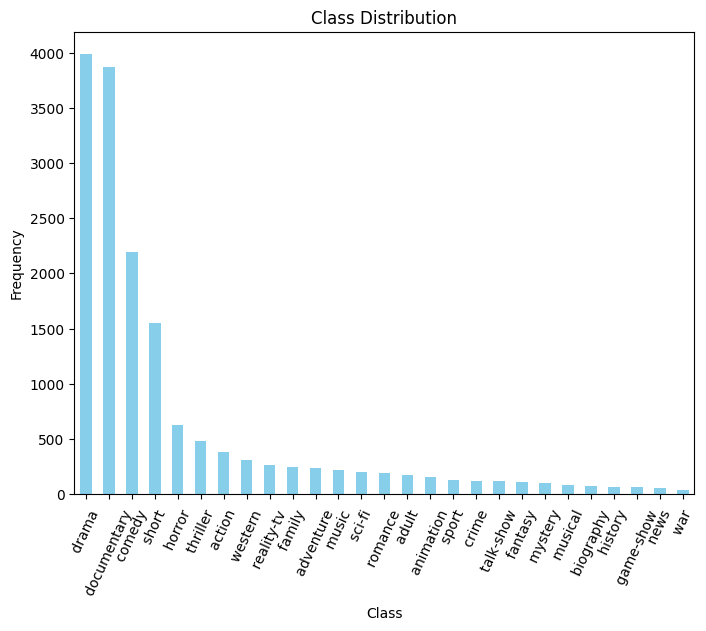

In [ ]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
y_train = train_data['Genre']


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_train_pred = nb_classifier.predict(X_train_tfidf)


print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred))

Accuracy on training set: 0.5103965032781768


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.64      0.02      0.05       383
       adult        0.00      0.00      0.00       175
   adventure        1.00      0.00      0.01       237
   animation        0.00      0.00      0.00       151
   biography        0.00      0.00      0.00        70
      comedy        0.62      0.41      0.49      2193
       crime        0.00      0.00      0.00       120
 documentary        0.57      0.91      0.70      3874
       drama        0.43      0.88      0.58      3992
      family        0.00      0.00      0.00       247
     fantasy        0.00      0.00      0.00       104
   game-show        0.00      0.00      0.00        61
     history        0.00      0.00      0.00        66
      horror        0.86      0.11      0.20       625
       music        0.00      0.00      0.00       219
     musical        0.00      0.00      0.00        77
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(test_data['Description'])

In [ ]:
X_test_predictions = nb_classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [ ]:
test_data.to_csv('predicted_genres.csv', index=False)

print(test_data)

                                  Id          Title  \
1              Edgar's Lunch (1998)       thriller    
2          La guerra de papá (1977)         comedy    
3       Off the Beaten Track (2010)    documentary    
4            Meu Amigo Hindu (2015)          drama    
5                 Er nu zhai (1955)          drama    
...                              ...            ...   
17713            Volunteers? (2009)    documentary    
17714      Doolittle Raiders (2006)    documentary    
17715                Sabbath (2008)         horror    
17716              Kadaikkan (2010)          drama    
17717    Die Seelen im Feuer (2014)          drama    

                                             Description Predicted_Genre  
1       L.R. Brane loves his life - his car, his apar...       thriller   
2       Spain, March 1964: Quico is a very naughty ch...         family   
3       One year in the life of Albin and his family ...    documentary   
4       His father has died, he hasn't 

In [ ]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
with open('nb_classifier.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

print("Models pickled successfully.")

Models pickled successfully.
